<br>
<img align="center" src="imagenes/logo.png"  width="200" height="141">
<font size=36><center> Machine Learning con Python </center> </font>
<br>

<h1 align='center'> Modulo IV: Machine Learning </h1>
<h2 align='center'>  Maquinas de Soporte Vectorial </h2>

---

# Aspectos teóricos

## Introducción

Las **Máquinas de Vector Soporte (Vector Support Machines, SVM)** es un algoritmo de clasificación y regresión desarrollado en la década de los 90, dentro del campo de la ciencia computacional. Aunque inicialmente se desarrolló como un método de clasificación binaria, su aplicación se ha extendido a problemas de clasificación múltiple y regresión. SVMs ha resultado ser uno de los mejores clasificadores para un amplio abanico de situaciones, por lo que se considera uno de los referentes dentro del ámbito de aprendizaje estadístico y machine learning.

Más formalmente, una SVM construye un hiperplano o conjunto de hiperplanos en un espacio de dimensionalidad muy alta que puede ser utilizado en problemas de clasificación o regresión. Una buena separación entre las clases permitirá una clasificación correcta.

Comprender los fundamentos de las SVMs requiere de conocimientos sólidos en álgebra lineal y optimización. En este documento no se profundizará en los aspectos matemáticos

## Hiperplano Separador

La definición matemática de un hiperplano es bastante simple. En el caso de dos dimensiones, el hiperplano se describe acorde a la ecuación de una recta:

$$\beta_0 + \beta_1 x_1 + \beta_2 x_2 = 0 $$

Todos aquellos pares ordenados $x = (x_1,x_2)$ para los cuales se cumple la igualdad, son puntos que están en el hiperplano. De forma más general en el caso n dimensional tenemos:

$$\beta_0 + \beta_1 x_1 + \beta_2 x_2+\ldots+ \beta_n x_n = 0 $$

y de igual manera, todos los puntos definidos por el vector $x= (x_1,x_2,\ldots,x_n)$ que satisfacen la ecuación del hiperplano.

Si un punto $x$ no satisface la ecuación, 

$$\beta_0 + \beta_1 x_1 + \beta_2 x_2+\ldots+ \beta_n x_n > 0 $$

o bien

$$\beta_0 + \beta_1 x_1 + \beta_2 x_2+\ldots+ \beta_n x_n <0 $$


entonces ese punto $x$ debe encontrarse en algunas de las regiones que separa este plano, es decir, cae a un lado u otro del hiperplano.

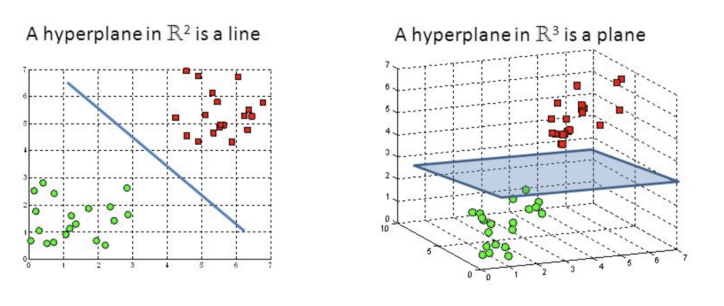

<div style="text-align: center"> Ejemplos de hiperplanos </div>

## Clasificación binaria usando hiperplanos

Si las observaciones están distribuidas de tal manera que se pueda **separar perfectamente** en dos clases (+1, -1) por un hiperplano, entonces este hiperplano cumple que:

$$\beta_0 + \beta_1 x_1 + \beta_2 x_2+\ldots+ \beta_n x_n > 0 \mbox{ si }y_i =1 $$


$$\beta_0 + \beta_1 x_1 + \beta_2 x_2+\ldots+ \beta_n x_n < 0 \mbox{ si }y_i =-1 $$

De esta manera un clasificador sencillo para este conjunto sería el siguiente:

$$f(x^{*}) = 
\beta_0 + \beta_1 x_1^{*} + \beta_2 x_2^{*}  +\ldots+ \beta_n x_n^{*} $$

que asigna +1 a la clase de $x^{*}$ si $f(x^{*})>0$ y -1 en caso contrario.

Cuando los conjuntos pueden separarse perfectamente por un hiperplano ocurre un problema y es que existen infinitos hiperplanos que pueden separar a ambas regiones, esto hace necesario que exista un método que permita seleccionar entre todos estos planos aquel que sea óptimo y genere el mayor margen de sesparación posible entre las clases.

<img align="center" src="imagenes/hiper_separador2.jpg"  width="800" height="600">

## Hiperplano de óptima separación

La solución al problema descrito anteriormente consiste en seleccionar como clasificador óptimo el hiperplano que se encuentra más alejado de todas las observaciones de entrenamiento. A este se le conoce como **maximal margin hyperplane o hiperplano óptimo de separación**. Para identificarlo, se tiene que calcular la distancia perpendicular de cada observación a un determinado hiperplano.

Los pasos básicos para resolver el problema serían:
1. Seleccionar dos hiperplanos que separen los datos sin puntos entre ellos.
2. Maximizar su margen.
3. Encontrar la linea promedio que está a la mitad  de ambos vectores de apoyo creados en el paso 1. Esta línea se llama **límite de decisión**

$$\mbox{ max }\Bigg(\frac{2}{||w||}\Bigg) \mbox{ s.a } y_i(wx_i+b)\ge 1$$

En la práctica es más fácil minimizar el término recíproco $\frac{1}{2}||w||^{2}$, el cual puede sesr resuelto como un problema de programación cuadrática, el cual no abordaremos acá.


## Casos que no son linealmente separables

El Support Vector Classifier, que es otra forma de definir el método descrito en el apartado anterior, consigue buenos resultados cuando el límite de separación entre clases es aproximadamente lineal. Si no lo es, su capacidad decae drásticamente. Una estrategia para enfrentarse a escenarios en los que la separación de los grupos es de tipo no lineal consiste en expandir las dimensiones del espacio original.

El hecho de que los grupos no sean linealmente separables en el espacio original no significa que no lo sean en un espacio de mayores dimensiones. Las imágenes siguientes muestran dos grupos cuya separación en dos dimensiones no es lineal, pero sí lo es al añadir una tercera dimensión.

<img align="center" src="imagenes/separacion_no_lineal.png"  width="400" height="400">

<img align="center" src="imagenes/separacion_no_lineal2.png"  width="400" height="400">

El **método de Máquinas Vector Soporte (SVM)** se puede considerar como una extensión del Support Vector Classifier obtenida al aumentar la dimensión de los datos. Los límites de separación lineales generados en el espacio aumentado se convierten en límites de separación no lineales al proyectarlos en el espacio original.

### Truco del kernel para encontrar hiperplanos separadores

Un **kernel (K)** es una función que devuelve el resultado del producto escalar entre dos vectores realizado en un nuevo espacio dimensional distinto al espacio original en el que se encuentran los vectores. Aunque no se ha entrado en detalle en las fórmulas matemáticas empleadas para resolver el problema de optimización, esta contiene un producto escalar. Si se sustituye este producto escalar por un kernel, se obtienen directamente los vectores soporte (y el hiperplano) en la dimensión correspondiente al kernel. Ha esto se le suele conocer como **kernel trick o truco del kernel**, porque con solo una ligera modificación del problema original, se puede obtener el resultado para cualquier dimensión. Existen multitud de kernels distintos, algunos de los más utilizados son:

* **Kernel lineal**
$$K(x,x') = x.x'$$

* **Kernel polinómico**
$$K(x,x') = (x.x'+c)^{d}$$

Cuando se emplea  $d = 1$  y  $c = 0$ , el resultado es el mismo que el de un kernel lineal. Si  $d > 1$ , se generan límites de decisión no lineales, aumentando la no linealidad a medida que aumenta  $d$ . No suele ser recomendable emplear valores de  d  mayores 5 por problemas de overfitting.

* **Kernel Gaussiano (RBF)**

$$K(x,x') = e^{-\gamma ||x-x'||^2})$$

El valor de  γ  controla el comportamiento del kernel, cuando es muy pequeño, el modelo final es equivalente al obtenido con un kernel lineal, a medida que aumenta su valor, también lo hace la flexibilidad del modelo.

Los kernels descritos son solo unos pocos de los muchos que existen. Cada uno tiene una serie de hiperparámetros cuyo valor óptimo puede encontrarse mediante validación cruzada. No puede decirse que haya un kernel que supere al resto, depende en gran medida de la naturaleza del problema que se esté tratando. Es muy recomendable probar el kernel RBF, este kernel tiene dos ventajas: que solo tiene dos hiperparámetros que optimizar ( $\gamma$ γ  y la penalización  $C$  común a todos los SVM) y que su flexibilidad puede ir desde un clasificador lineal a uno muy complejo.

# Práctica

## Ejemplo 1

Comenzaremos con un conjunto de datos de ejemplo en 2D que pueden ser separados por una límite lineal. 

### Importamos las librerías 

In [78]:
# Tratamiento de datos
import numpy as np
import pandas as pd

# Graficos
from matplotlib import pyplot as plt

# Preprocesado y modelado con sklearn
from sklearn.svm import SVC, LinearSVC

In [40]:
dataset1 = pd.read_csv('datos/svm.csv', sep='\t',header=None, names=['X1','X2','y'])

In [41]:
dataset1.head(10)

,X1,X2,y
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1
5,4.0150,3.1937,1
6,3.3814,3.4291,1
7,3.9113,4.1761,1
8,2.7822,4.0431,1
9,2.5518,4.6162,1


In [52]:
X = np.array(dataset1[['X1','X2']])

In [63]:
y = np.array(dataset1['y'])

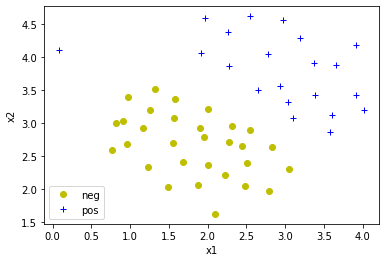

In [65]:
plt.plot(X[y == 0,0], X[y == 0,1], 'yo', label='neg')
plt.plot(X[y == 1,0], X[y == 1,1], 'b+', label='pos')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='lower left');

### Entrenamos un modelo lineal SVM con sklearn

In [66]:
clf = SVC(C=1, kernel='linear') 
clf.fit(X, y)

SVC(C=1, kernel='linear')

### Creamos una función para representar los vectores de soporte

In [74]:
def plot_boundary(X, clf):
    '''
    Traza un límite de decisión utilizando el clasificador entrenado clf.    
    El límite de decisión se dibuja en un nivel determinado (por defecto = 0,0)
    en el rango de X. 
    X debe ser una matriz de forma (m,2).
    '''
    
    x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
    x2_min, x2_max = X[:, 1].min(), X[:, 1].max()

    h = 0.01 # grid step size
    grid_x1, grid_x2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                                   np.arange(x2_min, x2_max, h))
    
    grid_y = clf.predict(np.c_[grid_x1.ravel(), grid_x2.ravel()])
    grid_y = grid_y.reshape(grid_x1.shape)

    x1_extra = (x1_max - x1_min) / 50
    x2_extra = (x2_max - x2_min) / 50
    
    plt.xlim(x1_min - x1_extra, x1_max + x1_extra)
    plt.ylim(x2_min - x2_extra, x2_max + x2_extra)
    
    plt.contour(grid_x1, grid_x2, grid_y)

In [70]:
def plot_support_vectors(clf):
    '''
    Traza los vectores de soporte del clasificador de vectores de soporte entrenado clf.
    
    Sólo se dibujan los vectores de soporte de las dos primeras clases
    '''
    
    # Se obtienen los vectores de soporte para las dos primeras clases
    sv_neg, sv_pos = np.vsplit(clf.support_vectors_, np.cumsum(clf.n_support_)[0:1])

    # Plot vectores de soporte
    plt.plot(sv_neg[:,0], sv_neg[:,1], 'r+', label='neg SVs', alpha=0.5)
    plt.plot(sv_pos[:,0], sv_pos[:,1], 'rx', label='pos SVs', alpha=0.5)
    plt.legend()

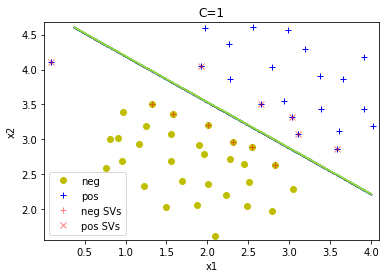

In [75]:
# Graficamos los puntos
plt.plot(X[y == 0,0], X[y == 0,1], 'yo', label='neg')
plt.plot(X[y == 1,0], X[y == 1,1], 'b+', label='pos')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='lower left');

# Graficamos los vectores de soporte
plot_support_vectors(clf)
# Graficamos la recta
plot_boundary(X, clf)
plt.title('C=1')
plt.show()

Como podemos apreciar, para C= 1, todos los puntos excepto 1, han sido clasificados correctamente. Este valor fue colocado intencionalmente para apreciar cómo cambian los resultados si cambiamos el valor de C. Informalmente, este parámetro C es un valor positivo que controla la penalización de los ejemplos mal clasificados durante el entrenamiento. Si aumentamos el valor de C, veremo que el clasificador es más estricto.

In [76]:
# Entrenamieento con C = 100
clf = SVC(C=100, kernel='linear') 
clf.fit(X, y)

SVC(C=100, kernel='linear')

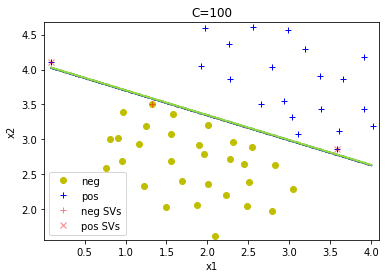

In [77]:
# Graficamos los puntos
plt.plot(X[y == 0,0], X[y == 0,1], 'yo', label='neg')
plt.plot(X[y == 1,0], X[y == 1,1], 'b+', label='pos')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='lower left');

# Graficamos los vectores de soporte
plot_support_vectors(clf)
# Graficamos la recta
plot_boundary(X, clf)
plt.title('C=100')
plt.show()

## Ejemplo: 2 SVM con kernel Gaussiano

In [79]:
dataset2 = pd.read_csv('datos/svm2.csv', sep='\t',header=None, names=['X1','X2','y'])

In [80]:
dataset1.head(10)

,X1,X2,y
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1
5,4.0150,3.1937,1
6,3.3814,3.4291,1
7,3.9113,4.1761,1
8,2.7822,4.0431,1
9,2.5518,4.6162,1


In [83]:
X = np.array(dataset2[['X1','X2']])
y = np.array(dataset2['y'])

### Gráfico de la región

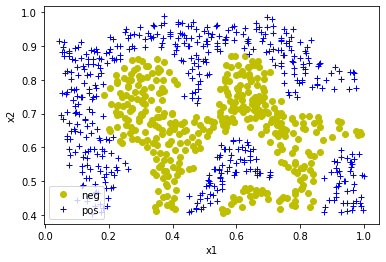

In [84]:
plt.plot(X[y == 0,0], X[y == 0,1], 'yo', label='neg')
plt.plot(X[y == 1,0], X[y == 1,1], 'b+', label='pos')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='lower left');

### Creamos el modelo con kernel Gaussiano 

In [85]:
clf = SVC(C=1, kernel='rbf', gamma=100)
clf.fit(X, y)

SVC(C=1, gamma=100)

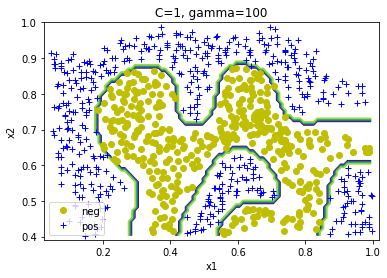

In [87]:
# Graficamos los puntos
plt.plot(X[y == 0,0], X[y == 0,1], 'yo', label='neg')
plt.plot(X[y == 1,0], X[y == 1,1], 'b+', label='pos')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='lower left');

plot_boundary(X, clf)
plt.title('C=1, gamma=100')
plt.show()